In [1]:
import pandas as pd
data= pd.read_csv("Data_random_1.csv")
data

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Speed
0,1,31.92,31.74,31.62,31.83,31.76,31.88,31.74,31.72,31.75,29.5,31.33,0.24075,5000
1,4,31.83,31.91,31.84,31.75,31.57,31.99,31.62,31.70,31.73,29.6,31.35,1.70925,5000
2,7,31.91,32.01,31.63,31.82,31.80,31.91,31.80,31.64,31.88,29.5,31.36,3.35975,5000
3,10,32.05,31.87,31.68,31.78,31.64,31.88,31.93,31.36,31.76,29.5,31.30,0.08725,5000
4,13,31.94,31.89,31.81,31.74,31.64,31.92,31.94,31.72,31.95,29.5,31.36,-1.31325,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,23141,41.41,42.37,42.84,44.30,45.37,47.09,47.04,41.19,38.88,30.8,32.39,23.61827,8000
7755,23144,41.42,42.53,42.76,44.26,45.15,46.57,47.12,41.75,38.55,30.8,32.27,23.57913,8000
7756,23147,41.42,42.12,42.85,44.38,45.37,46.85,46.97,41.66,38.43,30.6,32.32,23.60927,8000
7757,23150,41.24,42.50,43.03,44.26,45.04,47.02,47.06,41.22,38.31,30.7,32.31,23.86216,8000


In [2]:
#將時間還有變形量移除
data2= pd.read_csv("Data_random_1.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,13])
data2

,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Speed
0,31.92,31.74,31.62,31.83,31.76,31.88,31.74,31.72,31.75,29.5,31.33,5000
1,31.83,31.91,31.84,31.75,31.57,31.99,31.62,31.70,31.73,29.6,31.35,5000
2,31.91,32.01,31.63,31.82,31.80,31.91,31.80,31.64,31.88,29.5,31.36,5000
3,32.05,31.87,31.68,31.78,31.64,31.88,31.93,31.36,31.76,29.5,31.30,5000
4,31.94,31.89,31.81,31.74,31.64,31.92,31.94,31.72,31.95,29.5,31.36,5000
...,...,...,...,...,...,...,...,...,...,...,...,...
7754,41.41,42.37,42.84,44.30,45.37,47.09,47.04,41.19,38.88,30.8,32.39,8000
7755,41.42,42.53,42.76,44.26,45.15,46.57,47.12,41.75,38.55,30.8,32.27,8000
7756,41.42,42.12,42.85,44.38,45.37,46.85,46.97,41.66,38.43,30.6,32.32,8000
7757,41.24,42.50,43.03,44.26,45.04,47.02,47.06,41.22,38.31,30.7,32.31,8000


In [3]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

In [4]:
x=data2
y=data.Deformation

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
predict=model.fit(x_train,y_train).predict(x_test)
predict

array([13.38424081, 16.2495494 , 12.06468381, ..., 16.75996344,
       19.54969283, 16.22220833])

In [7]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test,predict))

print(rmse)

0.14643158069845866


<function matplotlib.pyplot.show(*args, **kw)>

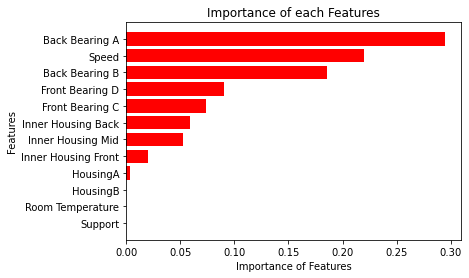

In [8]:
imp=model.feature_importances_
imp
import matplotlib.pyplot as plt
%matplotlib inline
names=data2.columns
zip(imp,names)
imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center',color="red")
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Features')
plt.show

In [9]:
print("Traing Score:%f"%model.score(x_train,y_train))
print("Testing Score:%f"%model.score(x_test,y_test))

Traing Score:0.999358
Testing Score:0.999013


In [10]:
from sklearn.ensemble import RandomForestRegressor
predict_df=[]
model=RandomForestRegressor(n_estimators=300,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
model.fit(x_train,y_train)
for m in range(0, len(x)):
    X_new = [x.iloc[m,:]]
    predict_df.append(model.predict(X_new))

In [11]:
import pandas as pd

#產出CSV檔                
def Output5000():   
    Result ='C://Users/User/Desktop/varre.csv'
    df_SAMPLE = pd.DataFrame.from_dict( predict_df )
    df_SAMPLE.to_csv( Result  , index=False )
    print( '成功產出'+Result )

In [12]:
Output5000()

成功產出C://Users/User/Desktop/varre.csv


In [13]:
import pandas as pd
data3= pd.read_csv("Data_random_4.csv")
data4= pd.read_csv("Data_random_4.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,13])
x2=data4
y2=data3.Deformation

In [14]:
from sklearn.ensemble import RandomForestRegressor
predict_df=[]
model=RandomForestRegressor(n_estimators=300,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
model.fit(x_train,y_train)
for m in range(0, len(x2)):
    X_new = [x2.iloc[m,:]]
    predict_df.append(model.predict(X_new))

In [15]:
import pandas as pd

#產出CSV檔                
def Output5000():   
    Result ='C://Users/User/Desktop/vre.csv'
    df_SAMPLE = pd.DataFrame.from_dict( predict_df )
    df_SAMPLE.to_csv( Result  , index=False )
    print( '成功產出'+Result )

In [16]:
Output5000()

成功產出C://Users/User/Desktop/vre.csv
